In [114]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# EM + NR algorithm

In [ ]:
# newton-raphson
def score(theta_t0):
    return -300*theta_t0**2+34*theta_t0+76

def hes(theta_t0):
    return -600*theta_t0+34

def newton_raphson(t0, n_iter):
    theta_seq = [t0]
    theta_t0 = t0
    for i in range(n_iter):
        s = score(theta_t0)
        hess = hes(theta_t0)
        theta_t1 = theta_t0 - s/hess
        theta_t0 = theta_t1
        print(f"iteration {i+1}: theta = {theta_t1}")
        theta_seq.append(theta_t0)
    return theta_t1, theta_seq

In [ ]:
theta_star_NR, theta_all_NR = newton_raphson(1, 10)

In [255]:
# EM
def EM(theta_0, n_iter):
    theta_seq = [theta_0]
    for i in range(n_iter):
        Z_11 = 24*((2+theta_0)/(2+3*theta_0))
        Z_12 = 24*((2*theta_0)/(2+3*theta_0))
        Z_2 = 21
        Z_3 = 38
        Z_4 = 17
        
        a = -Z_11-Z_12-76#Z_2-Z_3-Z_4
        b = Z_11-Z_12-114#2*Z_2-Z_3-2*Z_4
        c = 2*(Z_12+38)
        
        theta_11 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
        theta_12 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
        print(f"theta_1: {theta_11}")
        print(f"theta_2: {theta_12}")
        if ((theta_11 < 0) ^ (theta_12 < 0)):
            theta_0 = max(theta_11, theta_12)
        else:
            print(theta_11, theta_12)
            raise ValueError
        print(f"n_iter {i+1} - theta: {theta_0}")
        theta_seq.append(theta_0)
        print(f"Z_11 (prev): {Z_11} - Z_12 (prev): {Z_12}")
    return theta_0, theta_seq

In [257]:
theta_star_EM, theta_all_EM = EM(1, 10)

theta_1: -1.6640858643234875
theta_2: 0.5720858643234874
n_iter 1 - theta: 0.5720858643234874
Z_11 (prev): 14.399999999999999 - Z_12 (prev): 9.600000000000001
theta_1: -1.6112034261374355
theta_2: 0.5634196904810593
n_iter 2 - theta: 0.5634196904810593
Z_11 (prev): 16.61081321718119 - Z_12 (prev): 7.389186782818813
theta_1: -1.6097463865649408
theta_2: 0.5631759446554817
n_iter 3 - theta: 0.5631759446554817
Z_11 (prev): 16.671477904527045 - Z_12 (prev): 7.328522095472957
theta_1: -1.6097051040401242
theta_2: 0.5631690346027416
n_iter 4 - theta: 0.5631690346027416
Z_11 (prev): 16.673196528130873 - Z_12 (prev): 7.326803471869125
theta_1: -1.6097039334621395
theta_2: 0.5631688386630013
n_iter 5 - theta: 0.5631688386630013
Z_11 (prev): 16.67324526004309 - Z_12 (prev): 7.326754739956908
theta_1: -1.6097039002693259
theta_2: 0.5631688331069475
n_iter 6 - theta: 0.5631688331069475
Z_11 (prev): 16.673246641881086 - Z_12 (prev): 7.326753358118918
theta_1: -1.6097038993281125
theta_2: 0.56316883

0.5631688329448026

# Laplace's method

In [154]:
import numpy as np
import scipy 
a, b, c = -12, 3, 1
theta0=(-b-np.sqrt(b**2-4*a*c))/(2*a)
h=np.log(theta0*(1+theta0)**7*(1-theta0)**4)
h2=-1/theta0**2-7/(1+theta0)**2-4/(1-theta0)**2
print(theta0)

Int=45/64*np.exp(h)*np.sqrt(2*np.pi/-h2)*(stats.norm.cdf(x=1, loc=theta0, scale=np.sqrt(-1/h2))
                                          -stats.norm.cdf(x=0, loc=theta0, scale=np.sqrt(-1/h2)))
print(Int)

0.4395764348029479
0.20667669203288075


# Gibbs sampler

In [204]:
np.random.seed(96)
n, y, a, b=10, 7, 2, 2

sim=10000
num_start_pts = 3
multi_samples = {f'iter_{i}':{} for i in range(num_start_pts)}
z_start = [2, 4, 6]
for i in range(num_start_pts):
    samples = {'theta':[0], 'z':[z_start[i]]}
    for j in range(sim):
        new_theta = np.random.beta(samples['z'][-1]+a, n-samples['z'][-1]+b, 1)
        samples['theta'].append(new_theta)
        new_z = np.random.binomial(y,2*samples['theta'][-1]/(1+samples['theta'][-1]), 1)
        samples['z'].append(new_z)
    multi_samples[f'iter_{i}'] = samples

{'theta': [0], 'z': [2]}
{'theta': [0], 'z': [4]}
{'theta': [0], 'z': [6]}


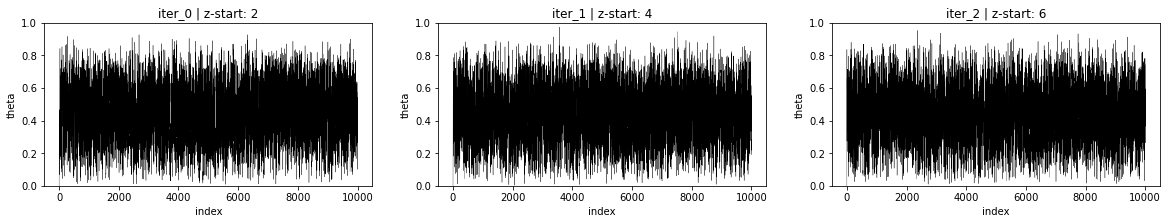

In [209]:
fig, ax = plt.subplots(1,3, figsize=(20,3))

for i, iteration in enumerate(multi_samples.keys()):
    ax[i].plot(multi_samples[iteration]['theta'], linewidth=0.3, label=iteration, c='black')
    ax[i].set_title(f"{iteration} | z-start: {z_start[i]}")
    ax[i].set_ylabel("theta")
    ax[i].set_xlabel("index")
    ax[i].set_ylim([0,1])
plt.savefig('images/conver.eps', bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


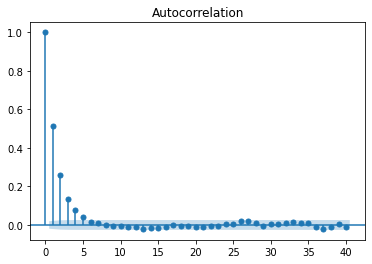

In [254]:
sm.graphics.tsa.plot_acf([i[0] for i in multi_samples["iter_0"]['theta'][1:]], lags=40)
plt.savefig("images/acf.eps", bbox_inches="tight")